# Exercise 1

## Reading and understanding netcdf files
https://unidata.github.io/netcdf4-python/
### Open a netcdf file

To read netcdf files you need a library that provides these function.  
One possible solution is the use of the library "netCDF4"  
This library provides the function "Dataset()" that can read netcdf files.  

In [1]:
import netCDF4 as nc
datafile = '/data/KlimDyn1/tHAMBURG-FUHLS.nc'
nc_data = nc.Dataset(datafile)
print(nc_data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: COARDS
    history:  Searching for station nr 10147 in v2.temperature.inv HAMBURG-FUHLS                 (GERMANY) coordinates:  53.63N,   10.00E,   15m (prob:    9m) WMO station code: 10147 HAMBURG-FUHLS temp from v2.mean_adj_nodup [Celsius] via the KNMI Climate Explorer (http://climexp.knmi.nl)
    dimensions(sizes): time(492)
    variables(dimensions): float32 time(time), float32 temp(time)
    groups: 


### Reading information
As you can see there are 2 variables stored: time(time) and temp(time), both with the dimension of time(492).  

In [2]:
time = nc_data['time']
temp = nc_data['temp']
print('Variable time:')
print(time)
print('-'*80)
print('Variable temp:')
print(temp)

Variable time:
<class 'netCDF4._netCDF4.Variable'>
float32 time(time)
    units: months since 1250-01-15
unlimited dimensions: time
current shape = (492,)
filling on, default _FillValue of 9.969209968386869e+36 used
--------------------------------------------------------------------------------
Variable temp:
<class 'netCDF4._netCDF4.Variable'>
float32 temp(time)
    long_name: HAMBURG-FUHLS
unlimited dimensions: time
current shape = (492,)
filling on, default _FillValue of 9.969209968386869e+36 used


### Get Access to the values

The variable time is saved in units of months beginning with 1250-01-15

In [3]:
time_values = time[:]
print(time_values[0:12])

[8412. 8413. 8414. 8415. 8416. 8417. 8418. 8419. 8420. 8421. 8422. 8423.]


The variable temp is of the same dimension, its unit is Celsius (see top)

In [4]:
x = temp[:]
print(x[0:12])

[ 1.1  1.4  1.9  7.  10.9 15.5 16.7 17.9 15.5  7.6  7.1  4.2]


## Dates in python
https://docs.python.org/3/library/datetime.html

In [5]:
import datetime
import dateutil
start_date = datetime.date(1250,1,15)
print('Start date: ',start_date)
add_month = dateutil.relativedelta.relativedelta(months=8412)
print('Timedelta: ',add_month)
print('Actual time: ',start_date + add_month)

Start date:  1250-01-15
Timedelta:  relativedelta(years=+701)
Actual time:  1951-01-15


Converting all time values and save them in a variable

In [6]:
add_months = [dateutil.relativedelta.relativedelta(months=x) for x in time]
dates = [start_date + x for x in add_months]
print(add_months[0:3])
print(dates[0:3])
print(dates[-1])

[relativedelta(years=+701), relativedelta(years=+701, months=+1), relativedelta(years=+701, months=+2)]
[datetime.date(1951, 1, 15), datetime.date(1951, 2, 15), datetime.date(1951, 3, 15)]
1991-12-15


## Plotting values
https://matplotlib.org/2.0.2/users/pyplot_tutorial.html

In [7]:
import matplotlib.pyplot as plt

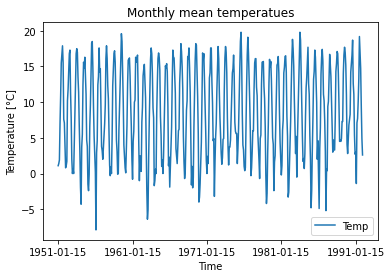

In [8]:
plt.plot(time,x,label = 'Temp')
plt.xticks(time[0::120],dates[0::120])
plt.xlabel("Time")
plt.ylabel('Temperature [°C]')
plt.title('Monthly mean temperatues')
plt.legend(loc="lower right")
plt.show()

## Creating a Modell
https://numpy.org/

In [2]:
import numpy as np

In [10]:
months_idx = np.arange(0,len(time))
h0 = np.ones(len(time))
h1 = np.linspace(0,1,len(time))
h2 = np.cos((2*np.pi*time[:])/12)
h3 = np.sin((2*np.pi*time[:])/12)
H = np.array([h0,h1,h2,h3]).T

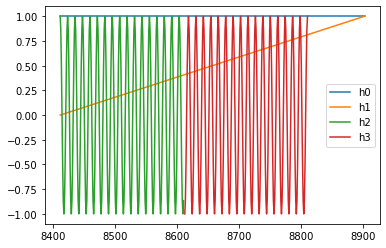

In [11]:
plt.plot(time,h0,label='h0')
plt.plot(time,h1,label='h1')
plt.plot(time[0:200],h2[0:200],label='h2')
plt.plot(time[201:400],h3[201:400],label='h3')
plt.legend(loc='right')
plt.show()

### Linear regression 
### Using matrix notation
$\vec{a}$ = $(H^T.H)^{-1}H^T\vec{X}$  

In [12]:
left = np.linalg.inv(np.dot(H.T,H))
right = np.dot(H.T,x)
b = np.dot(left,right)
print(b)

[ 8.18495747  0.79107574 -8.52086884 -1.19607415]


#### Using regression function from numpy
https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html

In [13]:
a, residuals, rank, s = np.linalg.lstsq(H, x,rcond=None)
print('a: ',a)
print('residuals: ',residuals,' -> Squared norm of missmatch = sum(y_i - f(x_i))^2')
print('rank: ',rank,' -> Rank of the matrix H')
print('singular values: ',s,' -> Singular values of H')


a:  [ 8.18495747  0.79107574 -8.52086884 -1.19607415]
residuals:  [1565.20564867]  -> Squared norm of missmatch = sum(y_i - f(x_i))^2
rank:  4  -> Rank of the matrix H
singular values:  [24.97387849 15.68509846 15.68404022  5.69745287]  -> Singular values of H


In [14]:
model = a[0]*h0 + a[1]*h1 + a[2]*h2 + a[3]*h3

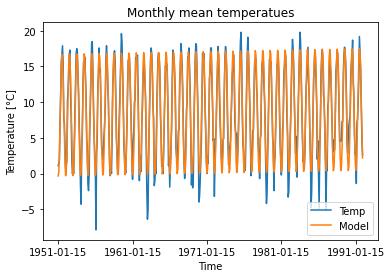

In [15]:
plt.plot(time,temp,label = 'Temp')
plt.plot(time,model,label='Model')
plt.xticks(time[0::120],dates[0::120])
plt.xlabel("Time")
plt.ylabel('Temperature [°C]')
plt.title('Monthly mean temperatues')
plt.legend(loc="lower right")
plt.show()